# Introduction to Scikit-Learn
Scikit-Learn, or sklearn, is the most promiment machine learning package in the scientific python library. It contains a number of state-of-the-art machine learning algorithms, as well as comprehensive [documentation](http://scikit-learn.org/stable/index.html). It is impressively fast, and the functions are constructed in such a way so as to involve the least amount of code possible for the user. Moreover, Scikit-Learn is designed for maximal compatibility with Pandas, making the training and testing of data very easy. 

At the highest level of description, all algorithms in scikit-learn are implemented as pythonic classes. All algorithms must first be initialzied (i.e. must initialize an instance of the class) with specified parameters. All algorithmic intances have a "fit" attribute for applying the algorithm to data. NumPy arrays, sparse data, and Pandas data structures are all accepted as inputs. 

To practice with Scikit-Learn, we will be applying some machine learning techniques to both "clean" and "messy" datasets. The purpose for using multiple datasets is to highlight the validity of the code with clean data (by reproducing classic clustering/classification/regression results), and demonstrate more complex use cases with noisier data. We introduce the datasets below.

## Dataset: [Iris Flower Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) 
The iris dataset is a classic dataset used in the machine learning literature to demonstrate clustering and classification algorithms. The data sets consists of 3 different types of irises (Setosa, Versicolour, and Virginica) and their respective petal and sepal length/widths. The data is has 150 observations and 4 variables. 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline

## Load dataset.
iris = read_csv(os.path.join('iris','iris.csv')).set_index('species')
iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2


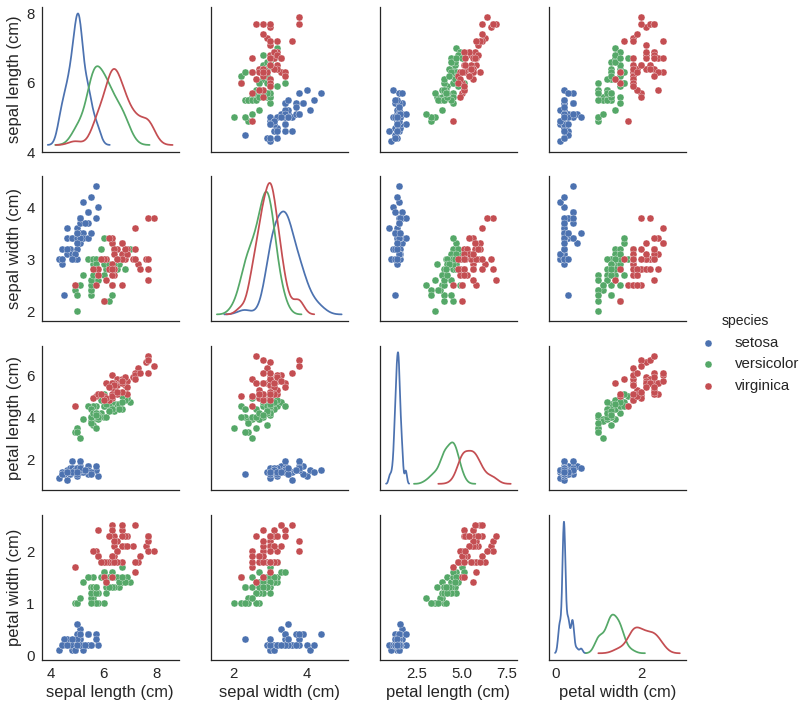

In [2]:
## Plot data.
sns.pairplot(iris.reset_index(), hue='species', diag_kind='kde');

## Dataset: [Diabetes](http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)
The dataset is standard for regression techniques. It is comprised of ten baseline variables, including age, sex, body mass index, average blood pressure, and six blood serum measurements. The outcome variable is the response of interest, a quantitative measure of disease progression one year after baseline. Measurements were obtained for 442 diabetes patients.

In [3]:
## Load data.
diabetes = read_csv(os.path.join('diabetes','diabetes.csv'))
diabetes.SEX -= 1
diabetes.head(5)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,1,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,0,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,1,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,0,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,0,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


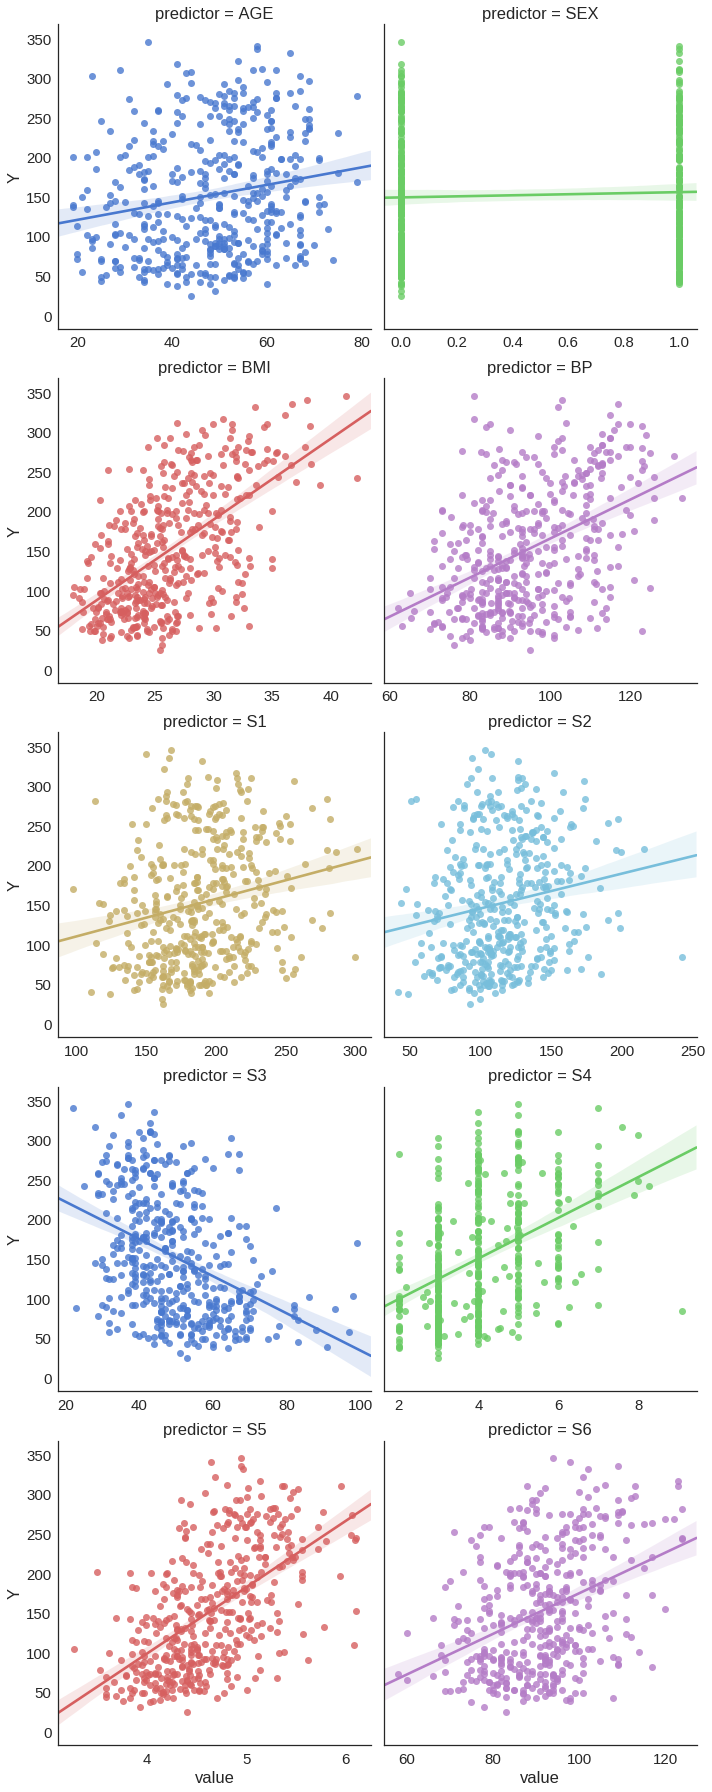

In [4]:
diabetes_melt = diabetes.melt(id_vars='Y', var_name='predictor')
sns.lmplot('value', 'Y', diabetes_melt, col='predictor', hue='predictor', 
           palette='muted', col_wrap=2, sharex=False);
del diabetes_melt

## Dataset: [Psychiatric Phenotyping](https://www.nature.com/articles/sdata2016110) 
This dataset was generously made available by the UCLA Consortium for Neuropsychiatric Phenomics. The larger study attempted to characterize the dimensional structure of cognitive function in both healthy individuals (130 subjects) and individuals with neuropsychiatric disorders including schizophrenia (50 subjects), bipolar disorder (49 subjects), and attention deficit/hyperactivity disorder (43 subjects). Participants of the study completed an extensive battery of neuropsychological testing. Here we will focus only self-report measures of psychiatric symptoms to try to distinguish between healthy and psychiatric participants, as well as predicting specific diagnoses.

In [5]:
## Load data.
symptoms = read_csv(os.path.join('phenotype','symptoms.csv'))
symptoms = symptoms.set_index('participant_id').set_index('diagnosis')
symptom_metadata = read_csv(os.path.join('phenotype','symptoms_info.csv'))

symptoms.head(5)

,sex,age,school,asrs01,asrs02,asrs03,asrs04,asrs05,asrs06,bipolar01,...,hopkins49,hopkins50,hopkins51,hopkins52,hopkins53,hopkins54,hopkins55,hopkins56,hopkins57,hopkins58
diagnosis,,,,,,,,,,,,,,,,,,,,,
CONTROL,1,30,16.0,2,1,1,2,2,3,0,...,0,0,0,0,0,0,0,0,1,0
CONTROL,0,24,16.0,1,2,2,3,3,2,0,...,0,0,1,0,0,0,1,0,0,0
CONTROL,0,49,16.0,2,2,3,1,1,0,0,...,0,2,2,3,0,2,2,0,0,0
CONTROL,0,40,12.0,1,0,1,2,1,1,0,...,0,1,0,0,0,0,0,0,1,0
CONTROL,0,21,13.0,1,1,1,1,0,3,0,...,0,0,0,0,0,0,0,0,0,0


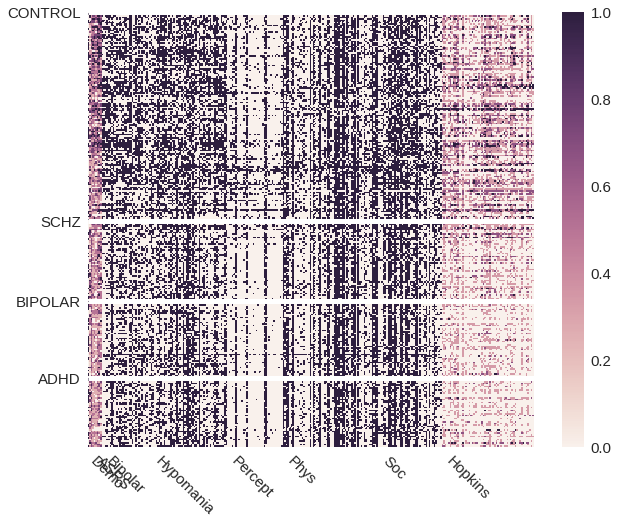

In [6]:
## Open Figure.
fig, ax = plt.subplots(1,1,figsize=(10,8))

## Make heatmap.
def normalize(arr):
    return (arr - arr.min()) / (arr.max() - arr.min())

ax = sns.heatmap(symptoms.apply(normalize), vmin=0, vmax=1,
                 annot=False, xticklabels=False, yticklabels=False,  ax=ax);

## Modify x-axis (add questionnaire information.)
surveys = symptom_metadata.Survey.unique()
indices = [np.argmax(symptom_metadata.Survey.as_matrix() == survey) for survey in surveys]
# ax.vlines(indices, 0, symptoms.shape[0], linewidth=5, color='w')
ax.set_xticks(indices)
ax.set_xticklabels(['Demo', 'ASRS', 'Bipolar', 'Hypomania',
                    'Percept', 'Phys', 'Soc', 'Hopkins'],
                    rotation=-45, ha='left')

## Modify y-axis (add diagnosis information).
diagnoses = symptoms.index.unique()
indices = [np.argmax(symptoms.index == diagnosis) for diagnosis in diagnoses]
ax.hlines(indices, 0, symptoms.shape[-1], linewidth=5, color='w')
ax.set_yticks(indices)
ax.set_yticklabels(diagnoses)
ax.set_ylabel('')
ax.invert_yaxis()

# Data Encoding 
Prior to fitting any models, we may want to preprocess the data as certain algorithms are very sensitiev to the scaling of the data. Here we cover several processing features available in NumPy, Pandas, and Scikit-Learn.

## Dummy Coding
We have previously covered dummy coding variables with both NumPy, using the where function, and Pandas, using the get_dummies function.  We highlight it again here once more using get_dummies to create dummy-coded variables for each diagnosis in the symptoms dataset and use it to create a new variable, *psychiatric*, which codes whether the participant had a DSM-IV diagnosis or not.

In [7]:
from pandas import get_dummies

## Make dummy coded variables.
symptoms_dummy = get_dummies(symptoms.index)
symptoms_dummy.head(5)

,ADHD,BIPOLAR,CONTROL,SCHZ
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [8]:
## Make new variable, psychiatric.
psychiatric = symptoms_dummy[['ADHD','BIPOLAR','SCHZ']].sum(axis=1)
psychiatric.index = symptoms.index
symptoms.insert(loc=0, column='psychiatric', value=psychiatric)
symptoms.head(5)

,psychiatric,sex,age,school,asrs01,asrs02,asrs03,asrs04,asrs05,asrs06,...,hopkins49,hopkins50,hopkins51,hopkins52,hopkins53,hopkins54,hopkins55,hopkins56,hopkins57,hopkins58
diagnosis,,,,,,,,,,,,,,,,,,,,,
CONTROL,0,1,30,16.0,2,1,1,2,2,3,...,0,0,0,0,0,0,0,0,1,0
CONTROL,0,0,24,16.0,1,2,2,3,3,2,...,0,0,1,0,0,0,1,0,0,0
CONTROL,0,0,49,16.0,2,2,3,1,1,0,...,0,2,2,3,0,2,2,0,0,0
CONTROL,0,0,40,12.0,1,0,1,2,1,1,...,0,1,0,0,0,0,0,0,1,0
CONTROL,0,0,21,13.0,1,1,1,1,0,3,...,0,0,0,0,0,0,0,0,0,0


## Digitizing
One command in NumPy not previously covered is the digitize command. This allows us to recode a variable by bins. Simplistically, let us recode *asrs01* of Symptoms, which ranges between 0 and 3, so as to binarize the variable.

In [9]:
## Define bins.
bins = [2]

## Apply.
arr = np.digitize(symptoms.asrs01, bins)

print(symptoms.asrs01[::20].as_matrix())
print(arr[::20])

[2 2 1 1 2 1 1 2 2 3 0 3 3 2]
[1 1 0 0 1 0 0 1 1 1 0 1 1 1]


## Data Transformations with Scikit-Learn
Scikit-Learn includes several built-in preprocessing algorithms for transforming/recoding data:
* **StandardScaler:** scales a variable such that it is mean = 0, sd = 1
* **RobustScaler:** scales a variable using medians and quartiles (i.e. 25% of data falls beneath 1st quartile)
* **MinMaxScaler:** scales a variable between a specified min and max (e.g. [0,1])
* **Normalizer:** scales each data point such that the feature vector has a euclidean length of one

We will test two of these now, applying the RobustScaler to all continous data and the MinMaxScaler to all nominal data.

In [10]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

## Initialize scalers.
robust = RobustScaler()
minmax = MinMaxScaler(feature_range=(0,1)) # defaults to [0,1]

## Apply RobustScaler to diabetes data.
contcols = [col for col in diabetes.columns if col != 'SEX']
diabetes[contcols] = robust.fit_transform(diabetes[contcols])

diabetes.head(5)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,0.433735,1,1.053498,0.380952,-0.637363,-0.514954,-0.571429,0.0,0.332755,-0.271186,0.084337
1,-0.096386,0,-0.674897,-0.285714,-0.065934,-0.254876,1.257143,-0.5,-1.010756,-1.491525,-0.526104
2,1.060241,1,0.790123,0.000000,-0.659341,-0.504551,-0.400000,0.0,0.073213,-0.406780,0.004016
3,-1.253012,0,-0.065844,-0.428571,0.263736,0.478544,-0.457143,0.5,0.375087,-0.135593,0.526104
4,0.000000,0,-0.444444,0.380952,0.131868,0.322497,0.228571,0.0,-0.457391,-0.745763,-0.044177


In [11]:
## Apply RobustScaler to symptoms data.
contcols = ['age','school']
symptoms[contcols] = robust.fit_transform(symptoms[contcols])

## Apply MinMaxScaler to symptoms data.
nomcols = [col for col in symptoms.columns if col not in contcols]
symptoms[nomcols] = minmax.fit_transform(symptoms[nomcols])

symptoms.loc[::50]

,psychiatric,sex,age,school,asrs01,asrs02,asrs03,asrs04,asrs05,asrs06,...,hopkins49,hopkins50,hopkins51,hopkins52,hopkins53,hopkins54,hopkins55,hopkins56,hopkins57,hopkins58
diagnosis,,,,,,,,,,,,,,,,,,,,,
CONTROL,0.0,1.0,-0.0625,0.666667,0.50,0.25,0.25,0.50,0.50,0.75,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.333333,0.0
CONTROL,0.0,0.0,-0.4375,0.666667,0.25,0.25,0.25,0.25,0.25,0.50,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
CONTROL,0.0,0.0,1.0000,0.666667,0.25,0.25,0.25,0.25,0.25,0.00,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
SCHZ,1.0,1.0,-0.1250,-0.666667,0.75,0.75,1.00,0.50,1.00,0.75,...,0.0,0.333333,0.333333,0.333333,0.0,0.666667,1.000000,0.0,0.666667,0.0
BIPOLAR,1.0,0.0,0.1875,-0.333333,0.00,0.25,0.00,0.25,0.25,0.50,...,0.0,0.000000,0.333333,0.000000,0.0,0.333333,0.000000,0.0,0.000000,0.0
ADHD,1.0,1.0,-0.2500,0.000000,1.00,0.75,0.75,1.00,0.50,0.50,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.333333,0.0,0.000000,0.0


For simplicity, we will binarize all non-continuous variables in the Symptoms dataset.

In [12]:
bins = [0.5]
symptoms[nomcols] = symptoms[nomcols].apply(np.digitize, bins=bins)
symptoms.loc[::50]

,psychiatric,sex,age,school,asrs01,asrs02,asrs03,asrs04,asrs05,asrs06,...,hopkins49,hopkins50,hopkins51,hopkins52,hopkins53,hopkins54,hopkins55,hopkins56,hopkins57,hopkins58
diagnosis,,,,,,,,,,,,,,,,,,,,,
CONTROL,0,1,-0.0625,0.666667,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
CONTROL,0,0,-0.4375,0.666667,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CONTROL,0,0,1.0000,0.666667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SCHZ,1,1,-0.1250,-0.666667,1,1,1,1,1,1,...,0,0,0,0,0,1,1,0,1,0
BIPOLAR,1,0,0.1875,-0.333333,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
ADHD,1,1,-0.2500,0.000000,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


# Feature Selection & Dimensionality Reduction
##  Removing features with low variance
Briefly, we will quickly introduce the feature selection tools available in Scikit-Learn beginning with the [VarianceThreshold](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold) tool. VarianceThreshold is a "simple baseline approach to feature selection... [that] removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. same value in all samples."

With our Symptom data binarized, it is very easy to quickly check for and remove variables that exhibit little variability (i.e. all answered yes or no). We will remove all variables in which over 80% of the sample all answered "yes" or "no".

In [13]:
from sklearn.feature_selection import VarianceThreshold

## Define threshold
threshold = 0.8 * (1 - 0.8)    # Covering both "yes" and "no"

## Initialize instance.
vt = VarianceThreshold(threshold=threshold)

## Fit to data.
symptoms_binary = symptoms.select_dtypes(include=['int'])
vtf = vt.fit(symptoms_binary)

## Extract and show remaining variables.
ix = vtf.get_support()
print('vtf.get_support() = %s' %ix[:10])
print('%0.0f%% of the variable remain.' %(ix.mean() * 100))

## Remove low variance columns from symptoms.
drop_cols = symptoms_binary.columns[~ix]
symptoms = symptoms.drop(drop_cols, 1)
print(symptoms.shape)

vtf.get_support() = [ True  True  True  True  True  True  True  True  True  True]
56% of the variable remain.
(271, 159)


We can replot the variables to confirm the reduced dataset shows more variability.

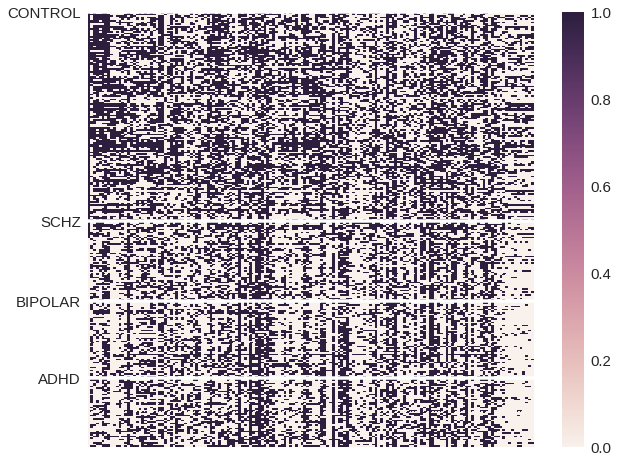

In [14]:
## Open Figure.
fig, ax = plt.subplots(1,1,figsize=(10,8))

## Plot reduced data.
ax = sns.heatmap(vt.fit_transform(symptoms_binary), vmin=0, vmax=1, 
                 annot=False, xticklabels=False, yticklabels=False,  ax=ax);

## Modify y-axis (add diagnosis information).
diagnoses = symptoms.index.unique()
indices = [np.argmax(symptoms.index == diagnosis) for diagnosis in diagnoses]
ax.hlines(indices, 0, symptoms.shape[-1], linewidth=3.5, color='w')
ax.set_yticks(indices)
ax.set_yticklabels(diagnoses)
ax.set_ylabel('')
ax.invert_yaxis()

## Variance Inflation Factor
One big issue in regression models is multicollinearity, or when two or more predictor variables in a multiple regression model are highly correlated, meaning that one can be linearly predicted from the others with a substantial degree of accuracy. The **variance inflation factor (VIF)** is a measure of collinearity, and tests for the increase of the variance of the parameter estimates if an additional variable is added to the linear regression. Statsmodels includes a variance inflation factor function. 

As we will be performing regression models on the diabetes data, and due to the presence of several strong correlations with the outcome variable, we will test for multicollinearity below. This can first be glimpsed by looking at the correlation matrix of the predictor variables.

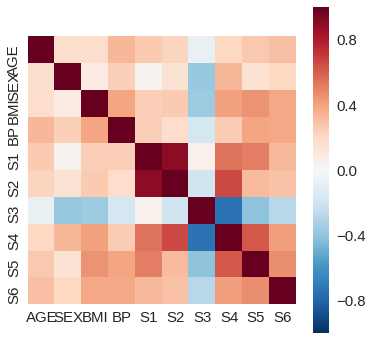

In [15]:
## Plot correlation matrix.
pred_cols = diabetes.columns[:-1]    # igorning outcome variable

plt.figure(figsize=(6,6))
sns.heatmap(diabetes[pred_cols].corr(), vmin=-1, vmax=1, square=True);

It is visually apparent there is a strong correlation between the S1 and S2 variables. We will explicitly measure the VIF to confirm this.

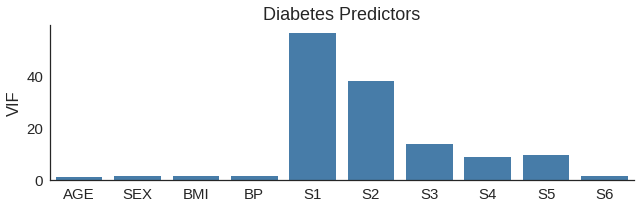

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Compute VIF.
vif = [variance_inflation_factor(diabetes[pred_cols].as_matrix(),n) for n in range(len(pred_cols))]

## Plot VIF.
fig = plt.figure(figsize=(9,3))
ax = sns.barplot(np.arange(pred_cols.shape[0]), vif, color='#377eb8');
ax.set_xticklabels(pred_cols)
ax.set_ylabel('VIF')
ax.set_title('Diabetes Predictors')

sns.despine()
plt.tight_layout()

One recommendation is that if VIF is greater than 5, then the explanatory variable is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.

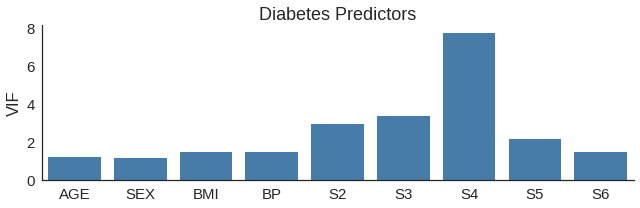

In [17]:
## Drop S1 variable.
diabetes = diabetes.drop('S1', 1)
pred_cols = diabetes.columns[:-1]    # igorning outcome variable

## Compute VIF.
vif = [variance_inflation_factor(diabetes[pred_cols].as_matrix(),n) for n in range(len(pred_cols))]

## Plot VIF.
fig = plt.figure(figsize=(9,3))
ax = sns.barplot(np.arange(pred_cols.shape[0]), vif, color='#377eb8');
ax.set_xticklabels(pred_cols)
ax.set_ylabel('VIF')
ax.set_title('Diabetes Predictors')

sns.despine()
plt.tight_layout()

## Feature Selection
Scikit-Learn also includes a number of featuers for the automatic reduction of features to those most explanatorily useful. These include:
* **Univariate approches:** selection of features with statistically significant relationships to the target. These approaches only consider each feature individually. Consequently a feature will be discarded if it is only informative when combined with another feature. 
* **Model-based approaches:** use a supervised machine learning model to judge the importance of each feature, and keeps only the most important ones. The supervised model that is used for feature selection doesn’t need to be the same model that is used for the final supervised modeling.
* **Iterative selection:** a series of models is built, with varying numbers of features. There are two basic methods: starting with no features and adding features one by one, until some stopping criterion is reached, or starting with all features and removing features one by one, until some stopping criterion is reached. 

Model-based and iterative selection methods are more complicated, powerful approaches. For now, we will demonstrate feature selection with the simpler univariate approaches. There are several functions to choose from including **SelectKBest**, **SelectPercentile**, **SelectFdr**, and **SelectFwe**. As the names imply, the first two functions select the K-best and N%-best features, whereas the latter two select features that are statistically significant after multiple comparisons corrections.

With 271 observations and 159 features, the phenotype dataset could stand to use a little more pruning.

In [18]:
from sklearn.feature_selection import SelectPercentile, SelectFdr, SelectFwe

## Initialize feature selection classes.
sel_percent = SelectPercentile(percentile=50)
fdr = SelectFdr(alpha=0.05)
fwe = SelectFwe(alpha=0.05)

## Fit data to each. Extract results using get_support.
sel_cols = sel_percent.fit(symptoms, symptoms.index).get_support()
fdr_cols = fdr.fit(symptoms, symptoms.index).get_support()
fwe_cols = fwe.fit(symptoms, symptoms.index).get_support()

for method, col_list in zip(['SelPer','FDR','FWE'],[sel_cols, fdr_cols, fwe_cols]):
    print('%s: %s columns remain.' %(method, col_list.sum()))

## Compute overlap using get_support.
print('SelectPercentile-FDR: %0.2f overlap.' %np.equal(sel_cols,fdr_cols).mean())
print('SelectPercentile-FWE: %0.2f overlap.' %np.equal(sel_cols,fwe_cols).mean())
print('FDR-FWE: %0.2f overlap.' %np.equal(sel_cols,fwe_cols).mean())

SelPer: 79 columns remain.
FDR: 95 columns remain.
FWE: 53 columns remain.
SelectPercentile-FDR: 0.90 overlap.
SelectPercentile-FWE: 0.84 overlap.
FDR-FWE: 0.84 overlap.


/home/szoro/Documents/software/anaconda3.6/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


The three methods are largely consistent in which parameters are rejected and differ predominantly in how liberal their rejection of features is. FDR is the most conservative in pruning, whereas FWE is the most liberal in feature pruning. We will use the FWE approach in order to really prune down the remaining variables. 

In [19]:
## Prune symptoms data according family-wise error selections.
symptoms = symptoms.loc[:,fwe_cols]
symptoms.shape

(271, 53)

# Unsupervised Learning
## Principal Component Analysis
From *Introduction to Machine Learning with Python*:
>Principal component analysis (PCA) is a method that rotates the dataset in a way
such that the rotated features are statistically uncorrelated. This rotation is often fol‐
lowed by selecting only a subset of the new features, according to how important they
are for explaining the data.

Running PCA is simple with SciKit-Learn. Simply import the algorithm and off we go.


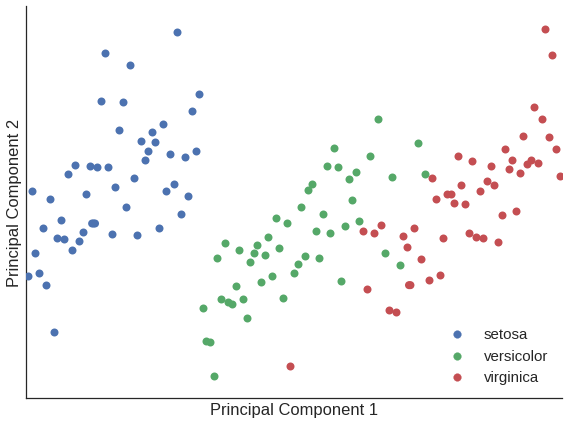

In [20]:
from sklearn.decomposition import PCA

## Initialize with desired number of components.
pca = PCA(n_components=2)

## Apply to iris data.
iris_pca = pca.fit_transform(iris)

## Plot.
fig = plt.figure(figsize=(8,6))
ax = sns.swarmplot(iris_pca[:,0], iris_pca[:,1], hue=iris.index, size=8);
ax.legend(loc=4)

## Fix axes.
ax.set_xticks([])
ax.set_xlabel('Principal Component 1')
ax.set_yticks([])
ax.set_ylabel('Principal Component 2')

sns.despine()
plt.tight_layout()

We can also plot the mappings of each variable onto principal components.

[ 0.92461621  0.05301557]


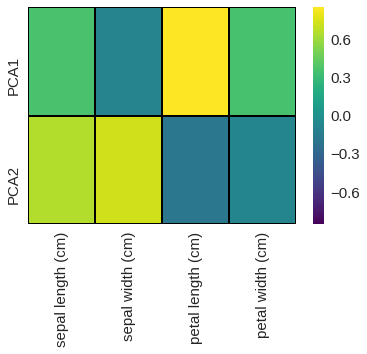

In [21]:
## Fit data without transforming.
iris_pca_fit = pca.fit(iris)

## Print variance explaiend.
print(iris_pca_fit.explained_variance_ratio_)

## Plot components.
sns.heatmap(iris_pca_fit.components_, cmap='viridis', xticklabels=iris.columns.tolist(),
            yticklabels=['PCA1','PCA2'], linewidth=1, linecolor='k');

Similarly we can apply PCA to the symptoms dataset.

[ 0.23668897  0.05862913]


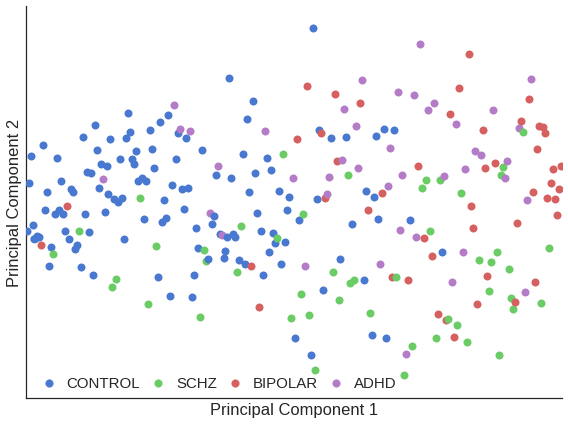

In [22]:
## Fit and transform.
symptoms_pca_fit = pca.fit(symptoms[symptoms.columns[1:]])  # Exclude psychiatric column.
symptoms_pca = symptoms_pca_fit.transform(symptoms[symptoms.columns[1:]])

## Print variance explaiend.
print(symptoms_pca_fit.explained_variance_ratio_)

## Plot.
fig = plt.figure(figsize=(8,6))
ax = sns.swarmplot(symptoms_pca[:,0], symptoms_pca[:,1], hue=symptoms.index, 
                   size=8, palette='muted');
ax.legend(loc=3, ncol=4, borderpad=0, handletextpad=0.2, columnspacing=0.2)

## Fix axes.
ax.set_xticks([])
ax.set_xlabel('Principal Component 1')
ax.set_yticks([])
ax.set_ylabel('Principal Component 2')

sns.despine()
plt.tight_layout()

## K-means Clustering
From *Introduction to Machine Learning with Python:*
> K-means tries to find cluster centers that are representative of certain regions of the
data. The algorithm alternates between two steps: assigning each data point to the closest
cluster center, and then setting each cluster center as the mean of the data points that
are assigned to it.The algorithm is finished when the assignment of instances to clusters no longer changes.

Below we will use K-means to cluster our data and compare its performance to the PCA we performed above.

In [23]:
from sklearn.cluster import KMeans

## Initialize K-means for iris.
kmeans = KMeans(n_clusters=3)

## Apply to iris.
kmeans_iris = kmeans.fit(iris)

## Show labels.
print(kmeans_iris.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


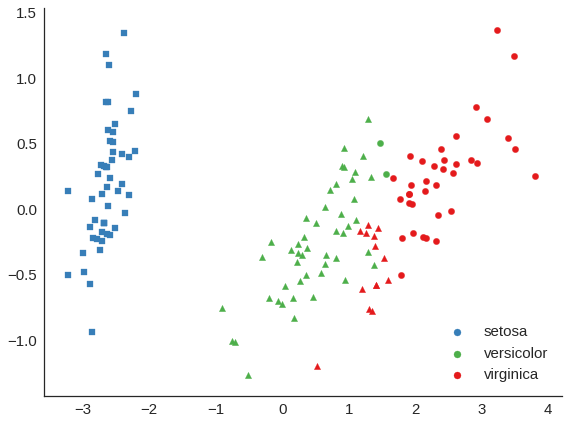

In [24]:
## Plot.
fig, ax = plt.subplots(1,1,figsize=(8,6))
cdict = dict(setosa='#377eb8', versicolor='#4daf4a', virginica='#e41a1c')
markers = ['o','s','^']

for n, label in enumerate(kmeans_iris.labels_):
    ax.scatter(iris_pca[n,0], iris_pca[n,1], s=40, 
               color=cdict[iris.index[n]], 
               marker=markers[label])

ax.scatter([],[],label='setosa',color=cdict['setosa'])
ax.scatter([],[],label='versicolor',color=cdict['versicolor'])
ax.scatter([],[],label='virginica',color=cdict['virginica'])
ax.legend(loc=4)

sns.despine()
plt.tight_layout();

## Agglomerative Clustering
From *Introduction to Machine Learning with Python:*
>Agglomerative clustering refers to a collection of clustering algorithms that all build
upon the same principles: The algorithm starts by declaring each point its own clus‐
ter, and then merges the two most similar clusters until some stopping criterion is
satisfied.

Scikit-Learn has implemented several linkage criteria to specify similarity of items:
1. Ward (default): merge the two clusters which minimizes the variance among possible merges the least.
2. Average: merge the two clusters with the smallest average distance among possible merges.
3. Complete (maximum): merge the two clusters with the smallest maximum distance of their points among possible merges.

This clustering procedure can be carried out via the AgglomerativeClustering class. 

In [25]:
from sklearn.cluster import AgglomerativeClustering 

## Initialize for iris.
agg = AgglomerativeClustering(n_clusters=3)

## Fit and predict.
iris_agg = agg.fit_predict(iris)
iris_agg

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

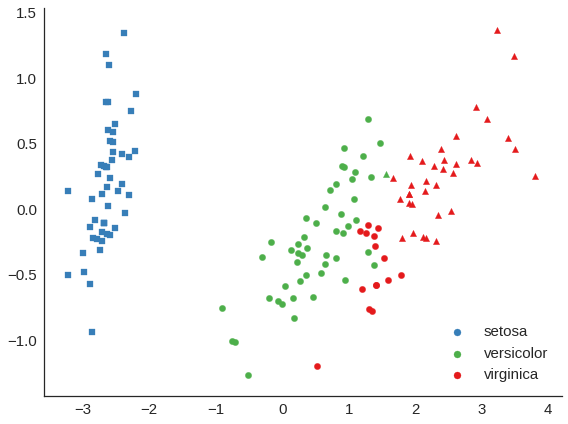

In [26]:
## Plot.
fig, ax = plt.subplots(1,1,figsize=(8,6))
cdict = dict(setosa='#377eb8', versicolor='#4daf4a', virginica='#e41a1c')
markers = ['o','s','^']

for n, label in enumerate(iris_agg):
    ax.scatter(iris_pca[n,0], iris_pca[n,1], s=40, 
               color=cdict[iris.index[n]], 
               marker=markers[label])

ax.scatter([],[],label='setosa',color=cdict['setosa'])
ax.scatter([],[],label='versicolor',color=cdict['versicolor'])
ax.scatter([],[],label='virginica',color=cdict['virginica'])
ax.legend(loc=4)

sns.despine()
plt.tight_layout();

As an aside, SciPy can be used to generate and visualize dendrograms using the same clustering techniques as can be seen in the example below:

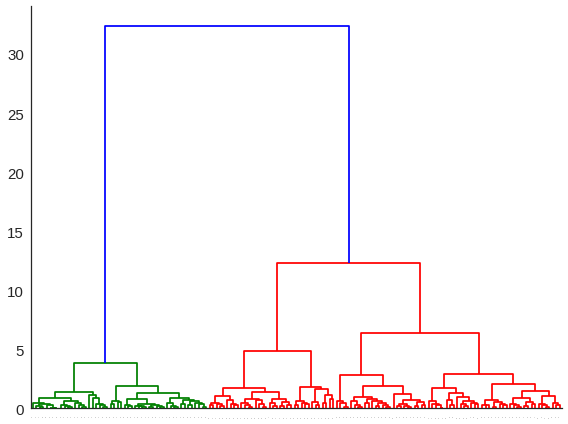

In [27]:
from scipy.cluster.hierarchy import dendrogram, ward
linkage_array = ward(iris)

fig, ax = plt.subplots(1,1,figsize=(8,6))
dendrogram(linkage_array, leaf_font_size=0, ax=ax);
sns.despine()
plt.tight_layout()

## And even more...
Scikit-Learn has even more unsupervised learning/clustering algorithms implemented, including DBSCAN, affinity-propogation, and Gaussian mixtures. They even have [comprehensive documentation](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html) detailing the strengths and weaknesses of various clustering techniques, and when certain algorithms should be expected to outperform others. It's all worth checking out!

# Supervised Learning
From *Introduction to Machine Learning with Python:*
> **Supervised learning** is used whenever we want to predict a certain outcome from a given input, and we have examples of input-output pairs. We build a machine learning model from these input-output pairs, which comprise our training set. Our goal is to make accurate predictions to new, never-before seen data.

>There are two major types of supervised machine learning algorithms, called **classification** and **regression.** In classification, the goal is to predict a class label. For regression tasks, the goal is to predict a continuous number.

> To assess the models’ performance, we show the model new data for which we have labels. This is usually done by splitting the labeled data we have collected into two parts. The part of the data is used to build our machine learning model, and is called the **training data or training set**. The rest of the data will be used to access how well the model works and is called **test data, test set or hold-out set.**

## Train-Test-Split & Cross-Validation
Scikit-learn contains a function, **train_test_split**, that shuffles the dataset and splits it for you. This is perhaps the most essential function in all of Scikit-Learn. Fortunately it handles Pandas arrays making it easily compatible with any data that can be read into Python via Pandas. We demonstrate this function below on the diabetes dataset.

In [28]:
from sklearn.model_selection import train_test_split

## Separate out precictors and outcomes.
X = diabetes[diabetes.columns[:-1]]
y = diabetes.Y

## Split our dataset into four variables using train_test_split.
## We hold out 20% of the data for prediction. All but the last
## column are predictors.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=0)

print('Diabetes data shape: (%s, %s)' %diabetes.shape)
print('Train data shape: (%s, %s)' %X_train.shape)
print('Test data shape: (%s, %s)' %X_test.shape)

Diabetes data shape: (442, 10)
Train data shape: (353, 9)
Test data shape: (89, 9)


One downside to train_test_split is that it splits the data only once. This can be problematic as that one model fit may be unrepresentative of the underlying true model fit as a result of the random allocation of data to the train/test sets. Thus, it is better to test models on multiple sets of the data. Fortunately, Scikit-Learn has many [built-in functions](http://scikit-learn.org/stable/modules/cross_validation.html) for sampling and resampling train/test sets:
* **K-fold:** divides all the samples in k groups of samples, called folds of equal sizes (if possible). The prediction function is learned using k - 1 folds, and the fold left out is used for test.
* **Leave One Out (LOO):** each learning set is created by taking all the samples except one, the test set being the sample left out. This cross-validation procedure does not waste much data as only one sample is removed from the training set.
* **Leave P Out (LPO):** very similar to LeaveOneOut as it creates all the possible training/test sets by removing p samples from the complete set.
* **Shuffle & Split:** generate a user defined number of independent train / test dataset splits. Samples are first shuffled and then split into a pair of train and test sets.
* **Stratified k-fold:** variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.
* **Stratified Shuffle & Split:**  variation of ShuffleSplit, which returns stratified splits, i.e which creates splits by preserving the same percentage for each target class as in the complete set.

We demonstrate two of these functions below.

In [29]:
from sklearn.model_selection import KFold, ShuffleSplit

## Initialize classes.
kf = KFold(n_splits=5, random_state=0)               # 5-fold cross validation
ss = ShuffleSplit(5, test_size=0.5, random_state=0)  # 5 splits, test size 0.5

for train, test in kf.split(diabetes[diabetes.columns[:-1]], diabetes.Y):
    print('KFold: %s %s' %(train.shape, test.shape))
    
for train, test in ss.split(diabetes[diabetes.columns[:-1]], diabetes.Y):
    print('ShuffleSplit: %s %s' %(train.shape, test.shape))

KFold: (353,) (89,)
KFold: (353,) (89,)
KFold: (354,) (88,)
KFold: (354,) (88,)
KFold: (354,) (88,)
ShuffleSplit: (221,) (221,)
ShuffleSplit: (221,) (221,)
ShuffleSplit: (221,) (221,)
ShuffleSplit: (221,) (221,)
ShuffleSplit: (221,) (221,)


## OLS Linear Models
We will begin the supervised regression models with the simplest algorithm: ordinary least squares (OLS). This simple model, however, will highlight for us much of the functionality and uses of supervised learning functions with Scikit-Learn.

In [30]:
from sklearn.linear_model import LinearRegression

## Initialize linear regression class.
lr = LinearRegression()

## Split data once.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=0)

## Fit data to model.
lrf = lr.fit(X_train, y_train)

## Use the score function to demonstrate model fit.
print('Train: R2 = %0.3f' %lrf.score(X_train, y_train))
print('Test: R2 = %0.3f' %lrf.score(X_test, y_test))

## Use the coef function extract model coefficients.
print(lrf.coef_)

Train: R2 = 0.551
Test: R2 = 0.324
[-0.01938454 -0.1827927   0.30141132  0.17268084 -0.09071002 -0.14477389
  0.03772952  0.2572398   0.02228104]


Our simple model performs ok, capturing about 55% of the variance during training and 30% of the variance testing. This suggests some strong overfitting to the training data. Let's experiment with the training set size to see if we can improve generalization. To do this, we will make use of the **cross_val_score** function, which lets us iteratively compute the test score of an estimator object given a cross-validation method.

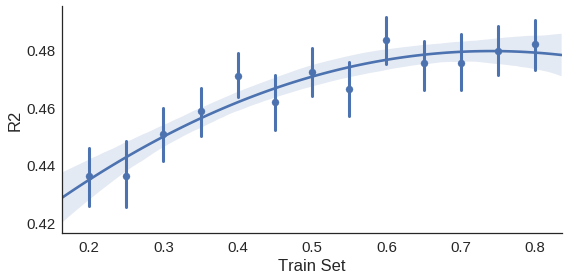

In [31]:
from pandas import DataFrame
from sklearn.model_selection import cross_val_score

## Define cross-validation parameters.
train_sizes = np.arange(0.2,0.81,0.05)
test_size = 0.2
n_splits = 250

## Main loop.
scores = []
for train_size in train_sizes:
    
    ## Initialize ShuffleSplit cross-validation method.
    ss = ShuffleSplit(n_splits=n_splits, test_size=0.2, train_size=train_size)
    
    ## Compute scores.
    scores.append( cross_val_score(lr, X, y, cv=ss) )
    
## Plot.
scores = np.concatenate(scores)
fig, ax = plt.subplots(1,1,figsize=(8,4))
ax = sns.regplot(np.repeat(train_sizes, n_splits), scores, x_bins=train_sizes, order=2, ax=ax)
ax.set_xlabel('Train Set')
ax.set_ylabel('R2')
sns.despine()
plt.tight_layout()

From the plot above, it seems that training sets of about 60% of the data are the sweet-spot for improving performance without overfitting the training data. Even with this, R2 values did not get above 0.50 on average. Can we improve performance?

## Penalized Regression (Ridge & Lasso)

Penalized regression methods are modeling techniques that force non-meaningful coefficients towards 0, thereby inducing sparsity in the model. Two such methods are ridge (l2-norm) regression and lasso (l1-norm) regression. We demonstrate cross-validated lasso regression below.

Lasso regression requires setting one parameter: alpha. This parameter sets the desired level of sparisity, with higher alpha levels forcing more parameter to go to 0. We will use Lasso to try out several different levels of alpha to test performance.

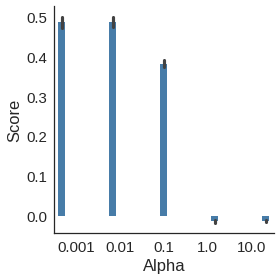

In [32]:
from pandas import DataFrame
from sklearn.linear_model import Lasso

## Initialize ShuffleSplit cross-validation method.
n_splits = 100
ss = ShuffleSplit(n_splits=n_splits, test_size=0.2, train_size=0.6, random_state=0)

## Define alphas.
alphas = np.power(10., np.arange(-3,2))

## Main loop.
scores = []
for alpha in alphas:
    
    lasso = Lasso(alpha=alpha)
    scores.append( cross_val_score(lasso, X, y, cv=ss) )

## Plot.
df = DataFrame(np.array([np.repeat(alphas, n_splits),np.concatenate(scores)]).T, 
               columns=('Alpha','Score'))
sns.factorplot('Alpha','Score','Alpha',df,kind='bar',palette=['#377eb8']);

Ultimately, lasso did not improve model performance much. 

## Logistic Regression
Similarly, we can perform logistic regression. To demonstrate, we will predict the presence of any psychiatric illness from our symptoms dataset. We will use the **LogisticRegressionCV** class, which allows to perform cross-validated penalized logistic regression all in one step. Similar to the ridge and lasso regression techniques, a single parameter (alpha) needs to be set. This parameter enforces sparsity in the resulting coefficients, which will be especially important here as our data has more columns than rows. **NOTE:** This will take several seconds to run.  

In [33]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedShuffleSplit

## Extract out predictors and outcomes.
X = symptoms[symptoms.columns[1:]]
y = symptoms.psychiatric

## Define alphas.
alphas = np.power(10., np.arange(-2,3))

## Define train sizes.
train_sizes = np.arange(0.2, 0.81, 0.05)
test_size = 0.2
n_splits = 50

## Main loop.
scores = []
for train_size in train_sizes:
    
    ## Initialize Shuffle & Split / Logistic Regression
    sss = StratifiedShuffleSplit(n_splits=n_splits, train_size=train_size,
                                 test_size=test_size, random_state=0 )
    lrcv = LogisticRegressionCV(Cs=alphas, cv=sss, penalty='l1', solver='liblinear')

    ## Fit model.
    lrfit = lrcv.fit(X,y)
    
    ## Append results.
    scores.append( lrfit.scores_[1] )
    
## Merge results.
scores = np.array(scores)
print(scores.shape)

(13, 50, 5)


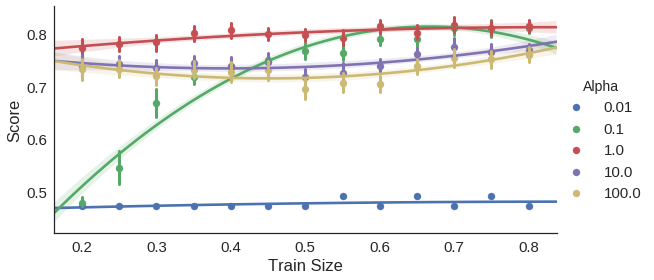

In [34]:
## Convert information into DataFrame
df = DataFrame(np.array([np.repeat(train_sizes, len(alphas)*n_splits),
                         alphas.tolist() * len(train_sizes)*n_splits,
                         scores.flatten()]).T,
              columns=('Train Size', 'Alpha', 'Score'))

## Plot.
sns.lmplot('Train Size', 'Score', df, hue='Alpha', x_bins=train_sizes, order=2, size=4, aspect=2);

As can be seen in the plot above, lower levels of Alpha (least penalizing) tend to perform worse than higher levels of alpha (most penalizing), which is consistent with our dataset, i.e. more parameter than observations. Of the penalizing models, higher training sets outperform lower training sets, with relatively decreasing marginal influence past 50% training. As such, we will refit the model alpha = 1.

Top 5 variables predicting CONTROL: chaphyp24 chaphyp17 chapsoc08 chaphyp21 school
Top 5 variables predicting PSYCHIATRIC: bipolar01 hopkins55 asrs01 chapper04 chaphyp08


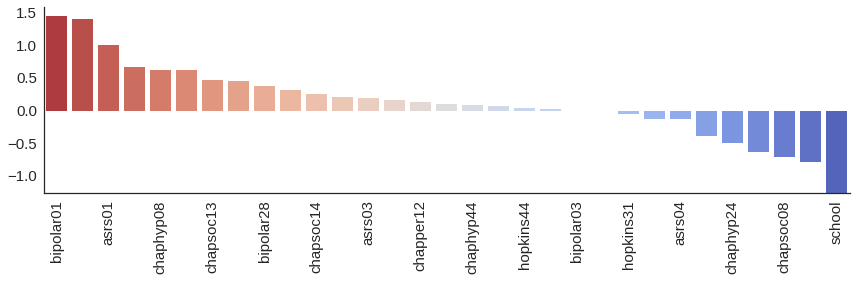

In [35]:
from sklearn.linear_model import LogisticRegression

## Initialize logistic regression instance.
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', random_state=0)

## Fit to full data.
lrfit = lr.fit(X,y)

## Extract and sort coefficients.
coef = lrfit.coef_.squeeze()
cols = X.columns[np.argsort(coef)[::-1]]   # Reverse sort (largest coefficients first)
coef = coef[np.argsort(coef)[::-1]]        # Reverse sort (largest coefficients first)
  
## Limit to non-zero coefficients.
cols = cols[np.nonzero(coef)]
coef = coef[np.nonzero(coef)]

## Print coefs.
print('Top 5 variables predicting CONTROL: %s' %' '.join(cols[-5:]))
print('Top 5 variables predicting PSYCHIATRIC: %s' %' '.join(cols[:5]))

## Plot coefficients.
fig = plt.figure(figsize=(12,4))
palette = sns.color_palette('coolwarm_r', len(coef))
ax = sns.barplot(np.arange(len(coef)), coef, palette=palette)
ax.set_xticks(np.arange(0,len(cols),2))
ax.set_xticklabels(cols[::2], rotation=90);

sns.despine()
plt.tight_layout()

## Support Vector Machines (SVM)
From Introduction to Machine Learning with Python:
>Kernelized support vector machines (often just referred to as SVMs) are an extension to linear support vector machines that allows for more complex models which are not defined simply by hyperplanes in the input space. SVMs work via the kernel trick, which works  works by directly computing the distance (more precisely, the scalar products) of the data points for the expanded feature representation, without ever actually computing the expansion.

SVMs are dependent on the choice of kernel and gamma, which scales the size of the kernel. Several kernels are implemented, including linear, polynomial (poly), radial basis function (rbf), and sigmoid. The gamma parameter can be controlled by the user, where small gammas result in large kernels with smooth boundaries between classes. Large gammas, in turn, results in small kernels and jagged boundaries as fewer points are considered nearby.

We will demonstrate SVM use with the iris dataset first. First we will test out the effect of basis function. We let gamma be automatically defined (default = 1 / n_features).

In [36]:
from sklearn.svm import SVC

## Extract predictors and outcomes.
X = iris.copy()
y = iris.index

## Initialize Split & Shuffle.
sss = StratifiedShuffleSplit(n_splits=50, train_size=0.75, test_size=0.25, random_state=0)

## Define kernels.
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

## Main loop.
for kernel in kernels:
    
    ## Initialize SVC.
    svc = SVC(kernel=kernel, random_state=0)
    
    ## Compute scores.
    scores = cross_val_score(svc, X, y, cv=sss)
    print('%s: mean score = %0.3f' %(kernel, scores.mean()))

linear: mean score = 0.978
poly: mean score = 0.963
rbf: mean score = 0.975
sigmoid: mean score = 0.316


We can see that, on average, the linear, polynomial, and radial basis function kernels are performing similarly well and are all out-performing the sigmoid kernel. Let's visualize why this might be the case using the two-dimensional PCA-reduced iris data. **NOTE:** Visualization code copied from [here](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html).

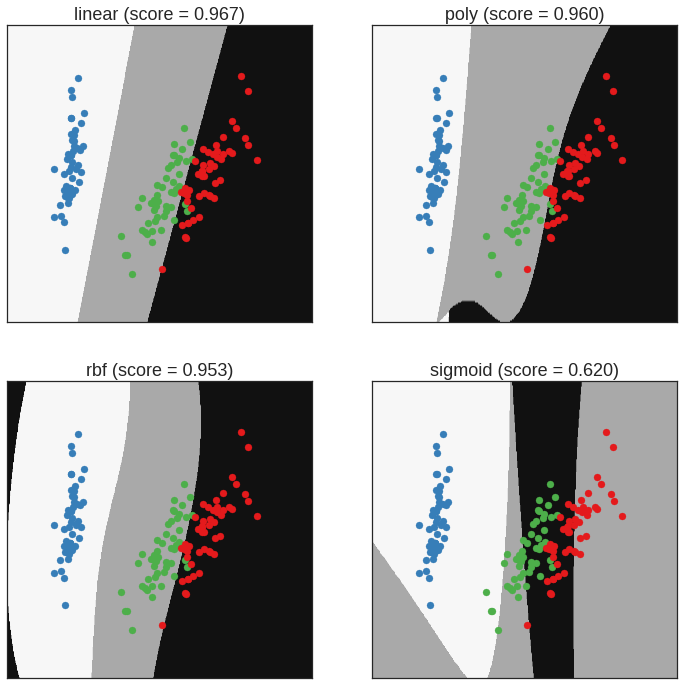

In [37]:
fig, axes = plt.subplots(2,2,figsize=(12,12),sharex=True,sharey=True)

## Define mesh grid for plotting.
x_min, x_max = iris_pca[:, 0].min() * 1.5, iris_pca[:, 0].max() * 1.5
y_min, y_max = iris_pca[:, 1].min() * 1.5, iris_pca[:, 1].max() * 1.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

for i, kernel in enumerate(kernels):
    
    ## Initialize and fit SVC to iris-PCA data. 
    svc_fit = SVC(kernel=kernel, random_state=0).fit(iris_pca, y)
    
    ## Compute score.
    score = svc_fit.score(iris_pca, y)
    
    ## Predict.
    prediction = svc_fit.predict(np.c_[xx.flatten(), yy.flatten()])
    prediction = prediction.reshape(xx.shape)
    prediction = np.where(prediction=='setosa', 0, np.where(prediction=='versicolor', 1, 2))
    
    ## Plot.
    cdict = dict(setosa='#377eb8', versicolor='#4daf4a', virginica='#e41a1c')
    axes[i//2,i%2].contourf(xx, yy, prediction)
    for xpos, ypos, c in np.c_[iris_pca, y]:
        axes[i//2,i%2].scatter(xpos,ypos,c=cdict[c])
    axes[i//2,i%2].set_xticks([])
    axes[i//2,i%2].set_yticks([])
    axes[i//2,i%2].set_title('%s (score = %0.3f)' %(kernel,score))

The above plots make it clear why the sigmoid kernel is underperforming. (Why it does what it does is beyond the scope of this example.) Moving forward, we will stick with the default radial basis function as it performs well and allows for reasonable flexibility in shape.

Now we will attempt to apply SVC to the phenotyping problem. For simplicity, and for the ability to visualize the data, we will use the symptoms PCA data. We will begin by attempting to find a good set of parameters for the SVC method. **NOTE:** This code may take a minute or two to run.

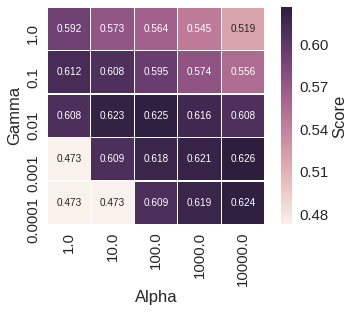

In [38]:
from sklearn.preprocessing import LabelEncoder

## Extract predictors and outcomes.
X = symptoms_pca
y = symptoms.index

## Use LabelEncoder to recode diagnoses.
yle = LabelEncoder().fit(y)
y = yle.fit_transform(y)

## Initialize Shuffle & Split / Logistic Regression
sss = StratifiedShuffleSplit(n_splits=50, train_size=0.8, test_size=0.2, random_state=0 )

## Define parameter space.
alphas = np.power(10., np.arange(5))
gammas = np.power(10., -np.arange(5))
xx, yy = np.meshgrid(alphas,gammas)
xxyy = np.c_[xx.flatten(),yy.flatten()]

## Iteratively compute scores.
scores = []
for alpha, gamma in xxyy:

        ## Initialize SVC.
        svc = SVC(C=alpha, gamma=gamma, kernel='rbf', random_state=0)
        
        ## Compute scores.
        scores.append( cross_val_score(svc, X, y, cv=sss ).mean() )

## Reshape scores.
scores = np.array(scores).reshape(xx.shape)

## Plot.
ax = sns.heatmap(scores, square=True,  annot=True, fmt='.3g', linewidths=0.25, 
                 xticklabels=alphas, yticklabels=gammas, cbar_kws=dict(label='Score'));
ax.set_xlabel('Alpha');
ax.set_ylabel('Gamma');

Based on the tests above, we will go with Alpha = 100 and Gamma = 0.01. Let us repeat for the PCA-symptoms data the same steps as performed above for the iris dataset. 

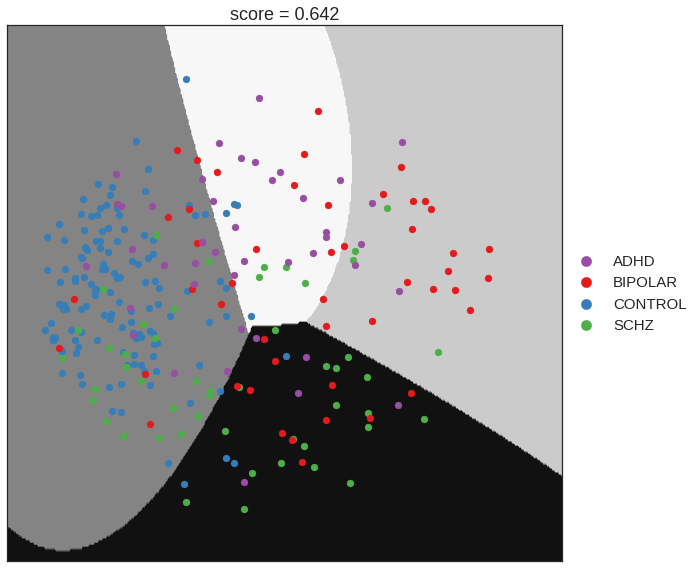

In [39]:
## Define mesh grid for plotting.
x_min, x_max = symptoms_pca[:, 0].min() * 1.25, symptoms_pca[:, 0].max() * 1.25
y_min, y_max = symptoms_pca[:, 1].min() * 1.25, symptoms_pca[:, 1].max() * 1.25
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

## Initialize and fit SVC to symptoms-PCA data. 
svc_fit = SVC(C=100, gamma=0.01, random_state=0).fit(symptoms_pca, y)

## Compute score.
score = svc_fit.score(symptoms_pca, y)

## Predict.
prediction = svc_fit.predict(np.c_[xx.flatten(), yy.flatten()])
prediction = prediction.reshape(xx.shape).astype(int)

## Plot.
fig, ax = plt.subplots(1,1,figsize=(8,8))
colors = ['#984ea3', '#e41a1c',   '#377eb8', '#4daf4a']
diagnoses = ['ADHD', 'BIPOLAR', 'CONTROL', 'SCHZ']

ax.contourf(xx, yy, prediction);
for xpos, ypos, c in np.c_[symptoms_pca, y]: 
    ax.scatter(xpos,ypos,c=colors[int(c)]);
for diag, color in zip(diagnoses, colors):
    ax.scatter([],[],label=diag,color=color)
ax.legend(loc=7, bbox_to_anchor=[1.25,0.5], markerscale=1.5)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('score = %0.3f' %score);
plt.tight_layout()

As can be seen above, the SVM accurately clusters much of the healthy controls (dark grey). However, it stumbles in classifying the remaining psychiatric subjects, in no small part due to the highly heterogenous spacing of these groups of participants. 

We can quantify the accuracies/inaccuracies of the model with a **confusion matrix.**

In [40]:
from sklearn.metrics import confusion_matrix

## Re-compute predictions from model.
y_predict = svc_fit.predict(X)

## Compute confusion matrix.
conf_mat = confusion_matrix(y, y_predict, labels=[2, 3, 1, 0])

## Convert to DataFrame for ease of reading.
conf_mat = DataFrame(conf_mat, columns=symptoms.index.unique(), index=symptoms.index.unique())

## Normalize within rows.
conf_mat = conf_mat.apply(lambda arr: arr / arr.sum(), 1)

conf_mat.round(3)

diagnosis,CONTROL,SCHZ,BIPOLAR,ADHD
diagnosis,,,,
CONTROL,0.931,0.031,0.000,0.038
SCHZ,0.460,0.380,0.080,0.080
BIPOLAR,0.250,0.229,0.375,0.146
ADHD,0.395,0.116,0.116,0.372


## Decision Trees
From the Introduction to Machine Learning with Python:
> Decision trees are a widely used models for classification and regression tasks. Essentially, they learn a hierarchy of “if-else” questions, leading to a decision. In the machine learning setting, these questions are called tests. To build a tree, the algorithm searches over all possible tests, and finds the one that is most informative about the target variable.

We highlight decision trees with the iris dataset. [This documentation](http://scikit-learn.org/stable/modules/tree.html#classification) provides a great overview of creating decision tree figures.

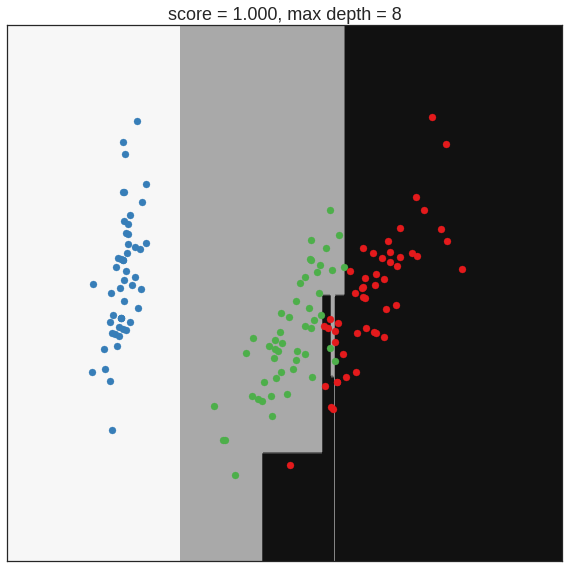

In [41]:
from sklearn.tree import DecisionTreeClassifier

## Extract predictors and outcomes.
X = iris_pca
y = iris.index

## Initialize and fit decision tree.
dtc_fit = DecisionTreeClassifier(random_state=0).fit(X,y)

## Compute score.
score = dtc_fit.score(X, y)

## Define mesh grid for plotting.
x_min, x_max = X[:, 0].min() * 1.5, X[:, 0].max() * 1.5
y_min, y_max = X[:, 1].min() * 1.5, X[:, 1].max() * 1.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

## Predict.
prediction = dtc_fit.predict(np.c_[xx.flatten(), yy.flatten()])
prediction = prediction.reshape(xx.shape)
prediction = np.where(prediction=='setosa', 0, np.where(prediction=='versicolor', 1, 2))

## Plot.
fig, ax = plt.subplots(1,1,figsize=(8,8))
cdict = dict(setosa='#377eb8', versicolor='#4daf4a', virginica='#e41a1c')

ax.contourf(xx, yy, prediction);
for xpos, ypos, c in np.c_[X, y]: 
    ax.scatter(xpos,ypos,c=cdict[c])
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('score = %0.3f, max depth = %s' %(score,dtc_fit.tree_.max_depth));
plt.tight_layout()

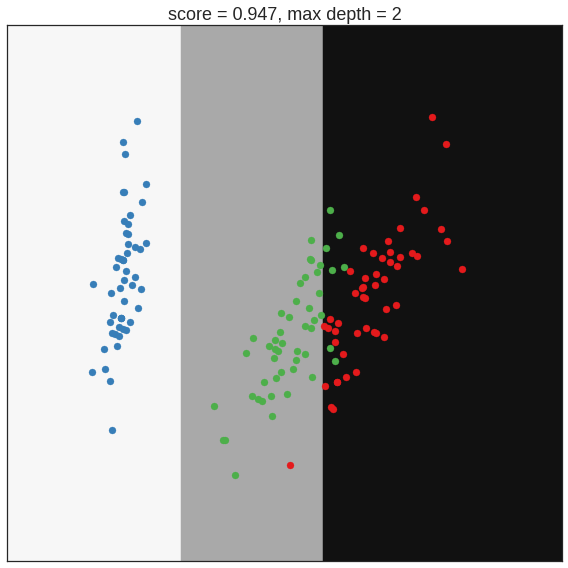

In [42]:
## Initialize and fit decision tree.
dtc_fit = DecisionTreeClassifier(max_depth=2, random_state=0).fit(X,y)

## Compute score.
score = dtc_fit.score(X, y)

## Define mesh grid for plotting.
x_min, x_max = X[:, 0].min() * 1.5, X[:, 0].max() * 1.5
y_min, y_max = X[:, 1].min() * 1.5, X[:, 1].max() * 1.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

## Predict.
prediction = dtc_fit.predict(np.c_[xx.flatten(), yy.flatten()])
prediction = prediction.reshape(xx.shape)
prediction = np.where(prediction=='setosa', 0, np.where(prediction=='versicolor', 1, 2))

## Plot.
fig, ax = plt.subplots(1,1,figsize=(8,8))
cdict = dict(setosa='#377eb8', versicolor='#4daf4a', virginica='#e41a1c')

ax.contourf(xx, yy, prediction);
for xpos, ypos, c in np.c_[X, y]: 
    ax.scatter(xpos,ypos,c=cdict[c])
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('score = %0.3f, max depth = %s' %(score,dtc_fit.tree_.max_depth));
plt.tight_layout()

Symptoms

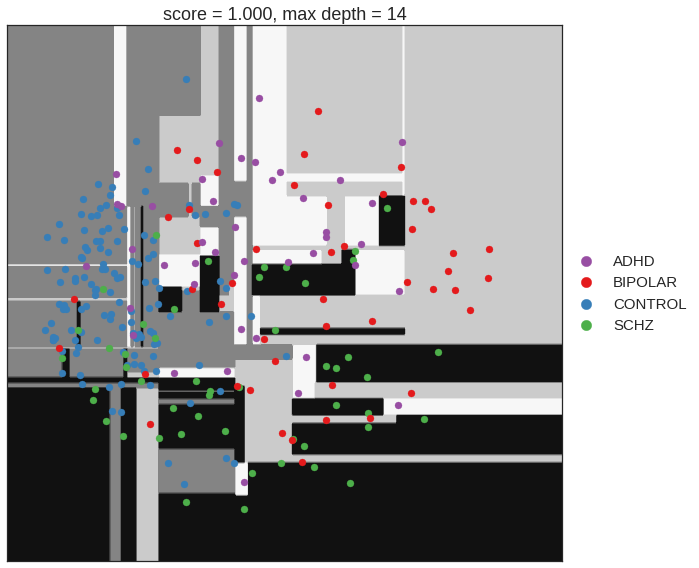

In [43]:
## Extract predictors and outcomes.
X = symptoms_pca
y = symptoms.index

## Use LabelEncoder to recode diagnoses.
yle = LabelEncoder().fit(y)
y = yle.fit_transform(y)

## Initialize and fit decision tree.
dtc_fit = DecisionTreeClassifier(random_state=0).fit(X,y)

## Compute score.
score = dtc_fit.score(X, y)

## Define mesh grid for plotting.
x_min, x_max = X[:, 0].min() * 1.25, X[:, 0].max() * 1.25
y_min, y_max = X[:, 1].min() * 1.25, X[:, 1].max() * 1.25
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

## Predict.
prediction = dtc_fit.predict(np.c_[xx.flatten(), yy.flatten()])
prediction = prediction.reshape(xx.shape)

## Plot.
fig, ax = plt.subplots(1,1,figsize=(8,8))
colors = ['#984ea3', '#e41a1c',   '#377eb8', '#4daf4a']
diagnoses = ['ADHD', 'BIPOLAR', 'CONTROL', 'SCHZ']

ax.contourf(xx, yy, prediction);
for xpos, ypos, c in np.c_[symptoms_pca, y]: 
    ax.scatter(xpos,ypos,c=colors[int(c)]);
for diag, color in zip(diagnoses, colors):
    ax.scatter([],[],label=diag,color=color)
ax.legend(loc=7, bbox_to_anchor=[1.25,0.5], markerscale=1.5)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('score = %0.3f, max depth = %s' %(score,dtc_fit.tree_.max_depth));
plt.tight_layout()

Find better level of max depth.

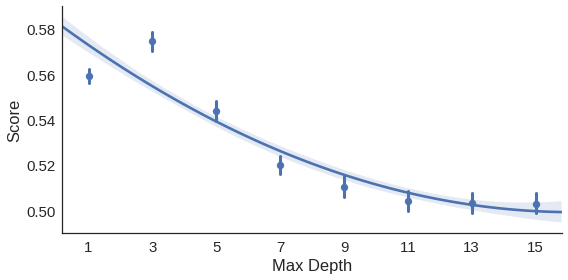

In [44]:
max_depths = np.arange(1,16,2)

## Initialize Shuffle & Split / Logistic Regression
n_splits = 250
sss = StratifiedShuffleSplit(n_splits=n_splits, train_size=0.5, test_size=0.5, random_state=0 )

scores = []
for max_depth in max_depths:
    
    dtc = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    scores.append( cross_val_score(dtc, X, y, cv=sss) )
    
## Plot.
df = DataFrame(np.array([np.repeat(max_depths, n_splits),np.concatenate(scores)]).T, 
               columns=('Max Depth','Score'))
g = sns.lmplot('Max Depth', 'Score', df, x_bins=max_depths, order=2, size=4, aspect=2);
g.ax.set_xticks(max_depths);

REfit

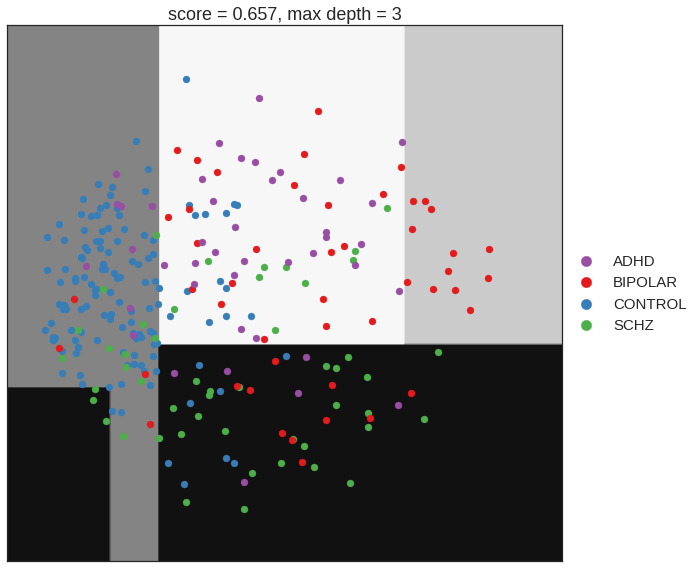

In [45]:
## Initialize and fit decision tree.
dtc_fit = DecisionTreeClassifier(max_depth=3, random_state=0).fit(X,y)

## Compute score.
score = dtc_fit.score(X, y)

## Define mesh grid for plotting.
x_min, x_max = X[:, 0].min() * 1.25, X[:, 0].max() * 1.25
y_min, y_max = X[:, 1].min() * 1.25, X[:, 1].max() * 1.25
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

## Predict.
prediction = dtc_fit.predict(np.c_[xx.flatten(), yy.flatten()])
prediction = prediction.reshape(xx.shape)

## Plot.
fig, ax = plt.subplots(1,1,figsize=(8,8))
colors = ['#984ea3', '#e41a1c',   '#377eb8', '#4daf4a']
diagnoses = ['ADHD', 'BIPOLAR', 'CONTROL', 'SCHZ']

ax.contourf(xx, yy, prediction);
for xpos, ypos, c in np.c_[symptoms_pca, y]: 
    ax.scatter(xpos,ypos,c=colors[int(c)]);
for diag, color in zip(diagnoses, colors):
    ax.scatter([],[],label=diag,color=color)
ax.legend(loc=7, bbox_to_anchor=[1.25,0.5], markerscale=1.5)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('score = %0.3f, max depth = %s' %(score,dtc_fit.tree_.max_depth));
plt.tight_layout()

In [46]:
## Re-compute predictions from model.
y_predict = dtc_fit.predict(X)

## Compute confusion matrix.
conf_mat = confusion_matrix(y, y_predict, labels=[2, 3, 1, 0])

## Convert to DataFrame for ease of reading.
conf_mat = DataFrame(conf_mat, columns=symptoms.index.unique(), index=symptoms.index.unique())

## Normalize within rows.
conf_mat = conf_mat.apply(lambda arr: arr / arr.sum(), 1)

conf_mat.round(3)

diagnosis,CONTROL,SCHZ,BIPOLAR,ADHD
diagnosis,,,,
CONTROL,0.831,0.062,0.00,0.108
SCHZ,0.220,0.580,0.00,0.200
BIPOLAR,0.083,0.208,0.25,0.458
ADHD,0.186,0.140,0.00,0.674


## Random Forests
From Introduction to Machine Learning with Python:
>A main drawback of decision trees is that they tend to overfit the training data. **Random forests**
are one way to address this problem. Random forests are essentially a collection of decision trees, where each tree is slightly different from the others. The idea of random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data. If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. This reduction in overfitting, while retaining the predictive power of the trees, can be shown using rigorous mathematics.

Random Forests can be implemented in Scikit-Learn using the RandomForestClassifier and RandomForestRegressor functions. A critical parameter here is max_features, which determines how many features a given tree will search. Using a high max_features will yield highly similar trees, each fitting to the most predictive features. Using a low max_features will yield heterogenous trees, some of which may need a large max_depth to fit the data well. To make predictions, the predictions of each tree are averaged.

Below we will demonstrate the abilities of Random Forest Classiciers on the full symptoms dataset (i.e. not PCA-reduced), exploring how the size of the forest and the max features affects classification. **NOTE:** The code below may take several minutes to run.

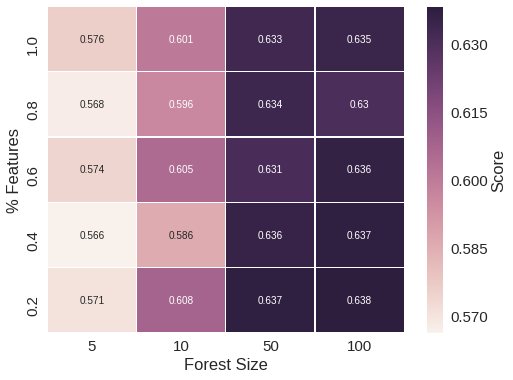

In [47]:
from sklearn.ensemble import RandomForestClassifier

## Extract predictors and outcomes.
X = symptoms[symptoms.columns[1:]]
y = symptoms.index

## Initialize Shuffle & Split / Logistic Regression
sss = StratifiedShuffleSplit(n_splits=50, train_size=0.8, test_size=0.2, random_state=0 )

## Define parameter space.
n_estimators = [5, 10, 50, 100]
max_features = [0.20, 0.40, 0.60, 0.80, 1.]
xx, yy = np.meshgrid(n_estimators,max_features)
xxyy = np.c_[xx.flatten(),yy.flatten()]

## Iteratively compute scores.
scores = []
for n_estimator, max_feature in xxyy:

        ## Initialize SVC.
        rfc = RandomForestClassifier(n_estimators=int(n_estimator), 
                                     max_features=max_feature,
                                     random_state=0)
        
        ## Compute scores.
        scores.append( cross_val_score(rfc, X, y, cv=sss ).mean() )

## Reshape scores.
scores = np.array(scores).reshape(xx.shape)

## Plot.
plt.figure(figsize=(8,6))
ax = sns.heatmap(scores,  annot=True, fmt='.3g', linewidths=0.25, 
                 xticklabels=n_estimators, yticklabels=max_features, 
                 cbar_kws=dict(label='Score'));
ax.set_xlabel('Forest Size');
ax.set_ylabel('% Features');
ax.invert_yaxis()

As can be seen above, there fairly large consensus of scores by the max features entered into the model (categorized as percentage of features included). What drives model predictive performance is the size of the forest, where a forest size of 50 achieves approximately the same performance as a forest of size 100 trees. We will now investigate its performance with an 80/20 split of the data and a confusion matrix. **NOTE:** We cannot fit to the full data, as decision trees/random forests will always perfectly fit the data if max_depth is not specified.

#### TODO: Show coefficients

In [48]:
## Split data.
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, stratify=y, 
                                                    random_state=0)

## Initialize model.
rfc = RandomForestClassifier(n_estimators=50, max_features=0.5, random_state=0)

## Fit to training data.
rfc_fit = rfc.fit(X_train, y_train)

## Predict classes.
y_predict = rfc_fit.predict(X_test)

## Print performance.
print('Train: score = %0.3f' %rfc_fit.score(X_train,y_train))
print('Test: score = %0.3f' %rfc_fit.score(X_test,y_test))

## Compute confusion matrix.
conf_mat = confusion_matrix(y_test, y_predict, labels=y.unique())

## Convert to DataFrame for ease of reading.
conf_mat = DataFrame(conf_mat, columns=y.unique(), index=y.unique())

## Normalize within rows.
conf_mat = conf_mat.apply(lambda arr: arr / arr.sum(), 1)

conf_mat.round(3)

Train: score = 0.995
Test: score = 0.564


diagnosis,CONTROL,SCHZ,BIPOLAR,ADHD
diagnosis,,,,
CONTROL,0.885,0.077,0.000,0.038
SCHZ,0.200,0.300,0.400,0.100
BIPOLAR,0.300,0.300,0.300,0.100
ADHD,0.444,0.111,0.222,0.222


## Neural Networks
Finally, we will briefly cover neural network (multilayer percepton) models. A more detailed introduction is largely beyond the scope of this tutorial (especially with [TensorFlow](https://www.tensorflow.org/) now on the scene), but we will briefly demonstrate the code for setting up a multilayer perceptron (MLP) network model.

Important for present purposes, neural network models have many parameters that can be used to tune performance. These include:
* **Number of nodes / layers** (hidden_layer_sizes): Determines the size of the neural network, with larger networks allowing for more complex relationships between features and outcomes.
* **Activation function** (activation): Determines the decision boundary between on/off of nodes in the network. Different functions induce more jagged (rectified linear unit, relu) or smooth (logistic/tanh) activation patterns.
* **Penalty function** (alpha): Regularizes the model, with higher values enforcing sparsity in the network. 
* **Iterations** (max_iter): The number of back-propagation steps the model takes in fitting the data.

It should also be noted that neural networks (similar to SVMs) are very sensitive to the scale of the data. Before fitting, data should be normalized so as to be on the same scale.

We will test several variants of neural networks on the full symptoms data to evaluate its performance.

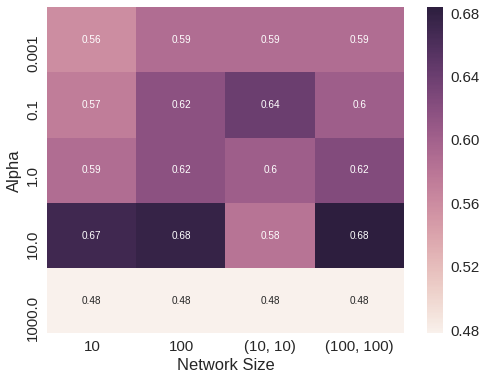

In [49]:
from sklearn.neural_network import MLPClassifier

## Define paraemters for testing.
hidden_layer_sizes = [(10), (100), (10,10), (100,100)] 
alphas = [1e-3, 1e-1, 1e0, 1e1, 1e3]

## Extract predictors and outcomes.
X = symptoms[symptoms.columns[1:]]
y = symptoms.index

## Split data.
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.5, stratify=y, 
                                                    random_state=0)

## Iteratively test.
scores = np.zeros((len(hidden_layer_sizes),len(alphas)))
for n, hls in enumerate(hidden_layer_sizes):
    
    for m, alpha in enumerate(alphas):
    
        ## Initialize.
        mlp = MLPClassifier(hidden_layer_sizes=hls, alpha=alpha,
                            solver='lbfgs', activation='tanh', random_state=0)
        
        
        ## Fit.
        mlp_fit = mlp.fit(X_train, y_train)
        
        ## Print score.
        scores[n,m] += mlp_fit.score(X_test, y_test)
        

## Plot.
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(scores.T, xticklabels=hidden_layer_sizes, yticklabels=alphas, annot=True)
ax.set_xlabel('Network Size')
ax.set_ylabel('Alpha')

As can be seen, the neural network can actually achieve relatively high levels of performance (marginally higher than observed with SVMs or random forests) with an appropriate level of sparsity (up to a point). Network size seems to have less of an effect in this case.